<a href="https://colab.research.google.com/github/valeriaquiroz/prueba_analistaRiesgos/blob/main/Pruebatecnica_ValeriaQuiroz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Elaborado por:** Valeria Quiroz Gómez 

**Prueba técnica**: Analista II - Riesgos 

In [105]:
#Importo librerías necesarias para el análisis
import numpy as np
import pandas as pd

In [106]:
#lectura de datos 
barrios= pd.read_csv("/content/barrios.csv")
dispositivos= pd.read_csv("/content/dispositivos.csv")
clientes= pd.read_csv("/content/clientes.csv")
#print(clientes) 

**Exploración inicial datos**

**Clientes**

In [107]:
clientes.describe() #estadísticas iniciales del set de datos de clientes

,num_doc,tipo_doc,cod_dispositivo,num_trx,mnt_total_trx
count,9.344600e+04,93446.000000,9.344600e+04,93446.000000,9.344600e+04
mean,5.556235e+16,1.029472,1.034233e+08,3.218094,1.662568e+08
std,5.355261e+18,0.175826,3.520896e+08,6.272303,1.365725e+09
min,-9.218699e+18,1.000000,6.000000e+01,1.000000,3.000000e+01
25%,-4.635638e+18,1.000000,2.751000e+03,1.000000,2.605000e+03
50%,-5.765486e+16,1.000000,8.040000e+03,1.000000,2.418600e+04
75%,4.578018e+18,1.000000,1.331828e+07,3.000000,7.392964e+06
max,9.223358e+18,9.000000,2.100028e+09,315.000000,1.232095e+11


En la variable num_doc hay valores negativos 

In [108]:
clientes['num_doc'].value_counts() #Según las estadísticas presentadas anteriormente, hay valores en num_doc con valores negativos, lo cual no hace sentido

 956540030589798895     173
-6943732889918790302    169
 3949050160426632961    161
-1808802995400694356    141
-6318594648243260200    125
                       ... 
-378202808759089638       1
-6248737884443146130      1
 2530778682456382302      1
-972818339998980442       1
 799482448657279624       1
Name: num_doc, Length: 10000, dtype: int64

Hay algunos clientes que están varias veces en la BD, como se evidencia en la tabla anterior, lo que indica que durante el periodo de tiemo analizado, tienen multiples transacciones con el banco.

Dado que hay valores negativos, realizo valor asoluto en los documentos, no tiene sentido que un número de documento sea negativo 

In [109]:
clientes['num_doc']= abs(clientes['num_doc']) #se realiza valor absoluto a la variable num_doc 
clientes

,num_doc,tipo_doc,canal,cod_dispositivo,num_trx,mnt_total_trx
0,6861792605025121524,1,POS,14812028,3,22218042.0
1,1552970090928921643,1,POS,14388938,3,21583407.0
2,4075904842556875666,1,POS,12370698,1,6185349.0
3,3539339627033221084,1,POS,10313583,2,10313583.0
4,5595554501572542610,1,POS,14358071,4,28716142.0
...,...,...,...,...,...,...
93441,5638568367379363305,2,POS,13809496,1,6904748.0
93442,6859292209449934659,2,DISPENSADOR,1116,1,558.0
93443,1762474661445594290,2,SAI,745,1,372.5
93444,2708241712915270749,2,DISPENSADOR,4090,1,2045.0


In [110]:
clientes.dtypes  #identifico qué tipo de variables contiene el dataset de clientes

num_doc              int64
tipo_doc             int64
canal               object
cod_dispositivo      int64
num_trx              int64
mnt_total_trx      float64
dtype: object

Cantidad de valores nulos de los datos 

In [111]:
print(clientes.isnull().sum()) #identifico que no hay valores nulos en el conjunto de datos de clientes 

num_doc            0
tipo_doc           0
canal              0
cod_dispositivo    0
num_trx            0
mnt_total_trx      0
dtype: int64


**Dispositivos**

In [112]:
print(dispositivos.isnull().sum()) #identifico si hay o no valores nulos en el conjunto de datos de dispositivos
#no hay valores nulos para este conjunto de datos 

tipo         0
codigo       0
latitud      0
longitud     0
id_barrio    0
dtype: int64


In [113]:
dispositivos.describe()  #estadísticas generales de la variable dispositivos

,codigo,latitud,longitud,id_barrio
count,3.728400e+04,37284.000000,37284.000000,3.728400e+04
mean,4.720819e+07,3.436528,-76.528010,7.379994e+08
std,2.956721e+08,0.030642,0.014803,5.779323e+03
min,1.800000e+01,3.332710,-76.564823,7.379958e+08
25%,1.131701e+07,3.418732,-76.537765,7.379982e+08
50%,1.286646e+07,3.444291,-76.530454,7.379988e+08
75%,1.443175e+07,3.459063,-76.523085,7.379994e+08
max,6.921701e+09,3.500923,-76.462670,7.380685e+08


**Barrios**

In [114]:
print(barrios.isnull().sum()) #No hay valores nulos en la variable de barrios

codigo    0
nombre    0
dtype: int64


# **Solución de preguntas**

**Pre procesamiento de los datos**


In [115]:
# preprocesamiento de datos 
dispositivos

,tipo,codigo,latitud,longitud,id_barrio
0,POS,1024702,3.451135,-76.530893,737998832
1,POS,1076402,3.446585,-76.517672,738000381
2,POS,1077002,3.446585,-76.517672,738000381
3,POS,3342404,3.476909,-76.485286,737998905
4,POS,3378003,3.485575,-76.516418,737998174
...,...,...,...,...,...
37279,POS,74486603,3.452831,-76.523627,737998935
37280,POS,74632603,3.450660,-76.533361,737998832
37281,POS,4023000120,3.450063,-76.530697,737998832
37282,POS,4408002741,3.434776,-76.543102,737999403


El ejercicio planteado brinda la información necesaria para el análisis de manera separada, es decir en 3 archivos csv diferentes, por tanto, se emplean métodos que permiten llevar la infromación a un solo conjunto de datos.

In [116]:
#Hago join para unir los data set según la clave asignada 

data= dispositivos.join(barrios.set_index('codigo'), on='id_barrio')
data= clientes.join(data.set_index('codigo'), on='cod_dispositivo')
data

data.to_csv('/content/data.csv')
data

,num_doc,tipo_doc,canal,cod_dispositivo,num_trx,mnt_total_trx,tipo,latitud,longitud,id_barrio,nombre
0,6861792605025121524,1,POS,14812028,3,22218042.0,POS,3.402118,-76.525681,737998244,Canaverales Los Samanes
1,1552970090928921643,1,POS,14388938,3,21583407.0,POS,3.468765,-76.484936,737998896,Jorge Eliecer Gaitan
2,4075904842556875666,1,POS,12370698,1,6185349.0,POS,3.400743,-76.524839,737998244,Canaverales Los Samanes
3,3539339627033221084,1,POS,10313583,2,10313583.0,POS,3.369544,-76.523664,738000400,Lili
4,5595554501572542610,1,POS,14358071,4,28716142.0,POS,3.419046,-76.497730,737996734,El Poblado
...,...,...,...,...,...,...,...,...,...,...,...
93442,6859292209449934659,2,DISPENSADOR,1116,1,558.0,DISPENSADOR,3.477404,-76.526705,737998252,Chipichape
93443,1762474661445594290,2,SAI,745,1,372.5,SAI,3.414325,-76.547986,737998095,Unidad Residencial Santiago de Cali
93443,1762474661445594290,2,SAI,745,1,372.5,DISPENSADOR,3.451204,-76.532942,737998832,San Pedro
93444,2708241712915270749,2,DISPENSADOR,4090,1,2045.0,DISPENSADOR,3.427551,-76.499991,737995769,Julio Rincón


In [117]:
print(data.isnull().sum()) #se válida que no queden datos nulos o missing en el conjunto de datos creado

num_doc            0
tipo_doc           0
canal              0
cod_dispositivo    0
num_trx            0
mnt_total_trx      0
tipo               0
latitud            0
longitud           0
id_barrio          0
nombre             0
dtype: int64


Una vez se tienen todos los datos organizados, procedo a responder las preguntas planteadas

**a) Generar el listado de clientes con transacciones en 5 o más barrios.**


In [118]:
clientes_transacciones=data.groupby(["num_doc"])["nombre"].nunique()  #considera clienes diferentes y agrupa por dispositivo
clientes_transacciones=pd.DataFrame(clientes_transacciones)
clientes_transacciones['num_doc']=clientes_transacciones[clientes_transacciones.nombre>=5] 
clientes_transacciones #extrae los clientes con al menos 5 barrios diferentes
clientes_transacciones=clientes_transacciones.dropna()
clientes_transacciones

#clientes_transacciones.to_csv('/content/sol_prog_ej_a.csv')

,nombre,num_doc
num_doc,,
10262142017143447,6,6.0
34833399121523352,5,5.0
37573732323950758,32,32.0
39150111350595950,11,11.0
42713176869523877,29,29.0
...,...,...
9207292192995699304,9,9.0
9210147727599394517,7,7.0
9218698523982046880,8,8.0


**b)¿Cuáles son los 6 barrios donde la mayor cantidad de clientes únicos realizan transacciones en dispositivos tipo PAC? La respuesta debe incluir la cantidad de clientes únicos asociados a estos barrios.**


c) ¿Cuáles son los 5 barrios donde la mayor cantidad de clientes únicos realizan transacciones en dispositivos tipo POS? La respuesta debe incluir la cantidad de clientes asociados a estos barrios

In [119]:
data

,num_doc,tipo_doc,canal,cod_dispositivo,num_trx,mnt_total_trx,tipo,latitud,longitud,id_barrio,nombre
0,6861792605025121524,1,POS,14812028,3,22218042.0,POS,3.402118,-76.525681,737998244,Canaverales Los Samanes
1,1552970090928921643,1,POS,14388938,3,21583407.0,POS,3.468765,-76.484936,737998896,Jorge Eliecer Gaitan
2,4075904842556875666,1,POS,12370698,1,6185349.0,POS,3.400743,-76.524839,737998244,Canaverales Los Samanes
3,3539339627033221084,1,POS,10313583,2,10313583.0,POS,3.369544,-76.523664,738000400,Lili
4,5595554501572542610,1,POS,14358071,4,28716142.0,POS,3.419046,-76.497730,737996734,El Poblado
...,...,...,...,...,...,...,...,...,...,...,...
93442,6859292209449934659,2,DISPENSADOR,1116,1,558.0,DISPENSADOR,3.477404,-76.526705,737998252,Chipichape
93443,1762474661445594290,2,SAI,745,1,372.5,SAI,3.414325,-76.547986,737998095,Unidad Residencial Santiago de Cali
93443,1762474661445594290,2,SAI,745,1,372.5,DISPENSADOR,3.451204,-76.532942,737998832,San Pedro
93444,2708241712915270749,2,DISPENSADOR,4090,1,2045.0,DISPENSADOR,3.427551,-76.499991,737995769,Julio Rincón


Según los datos, apenas 17 clientes, utilizan el dispositivo PAC. Lo que significa un 0,01796% de los clientes

In [120]:
#Punto b
pac=data['tipo']=data[data.tipo=='PAC']  #primero se filtra por tipo de dispositivo PAC
#c=c[c['tipo'].notna()]
transacciones=pac.groupby(["tipo", 'nombre'])["num_doc"].nunique()  
transacciones=pd.DataFrame(transacciones)
transacciones=transacciones.nlargest(6, ['num_doc'])  #extraigo los 6 barrios con mayor cantidad de clientes
#transacciones
transacciones.to_csv('/content/sol_prog_ej_b.csv')
transacciones

num_doc
tipo nombre                   
PAC  San Nicolás             5
     Colseguros Andes        4
     San Pedro               4
     El Troncal              1
     Las Delicias            1
     Prados del Norte        1

Text(0.5, 0.98, 'Barrios con transacciones por PAC')

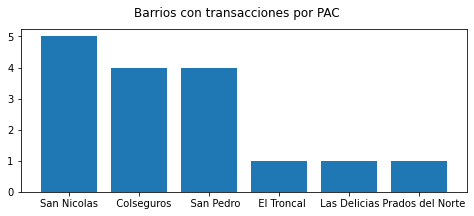

In [121]:
#Grafica con los 6 barrios que mas tienen transacciones 
import matplotlib.pyplot as plt
names = ['San Nicolas', '   Colseguros', '    San Pedro', '  El Troncal', ' Las Delicias','   Prados del Norte']
values = [5, 4,4,1,1,1]

plt.figure(figsize=(8, 3))

plt.bar(names, values)
plt.suptitle('Barrios con transacciones por PAC')

**c) ¿Cuáles son los nombres de los barrios en los que se realizaron los movimientos de al menos el 70% del dinero total tranzado por cada cliente? Considere que los clientes pueden tener más de un barrio en donde acumulan sus transacciones de mayor valor.**

In [122]:
totaltransado= data.groupby(['num_doc', 'nombre']).sum()
totaltransado= totaltransado['mnt_total_trx']
totaltransado=pd.DataFrame(totaltransado)
totaltransado


mnt_total_trx
num_doc             nombre                                            
1567023207759444    Unicentro Cali                              2881.0
                    Urbanización Militar                         404.0
3725429380492324    El Sena                                     2563.0
                    Los Alcázares                               4176.0
                    Los Guaduales                               6772.0
...                                                                ...
9222313660278362882 El Sena                                      257.0
9222542349226241781 El Sena                                552208326.5
                    Santa Teresita                               361.0
                    Unidad Residencial Santiago de Cali    552213544.5
9223358026146793149 Santa Teresita                               361.0

[55766 rows x 1 columns]

In [123]:
total=  totaltransado.groupby(['num_doc']).sum()
totaltransado['porcentaje']= (totaltransado/total)

totaltransado=totaltransado[totaltransado.porcentaje>=0.7]  
totaltransado=totaltransado.dropna()
totaltransado=totaltransado.sort_values(by='porcentaje')
#totaltransado
totaltransado.to_csv('/content/sol_prog_ej_c.csv')
totaltransado

,,mnt_total_trx,porcentaje
num_doc,nombre,,
5542809286703756761,El Sena,2.512382e+09,0.700120
409511976596849430,Urbanización Militar,5.606096e+08,0.700875
9180337209382160891,Calima,2.893940e+09,0.700968
3345600797923940767,Siete de Agosto,5.425612e+08,0.701047
6636136830421702189,Urbanización Tequendama,6.862900e+04,0.701373
...,...,...,...
3904286515270779042,Santa Rita,4.050000e+02,1.000000
3902603275781758223,Siete de Agosto,2.620369e+07,1.000000
3902410054342391664,Urbanización Ciudad Jardín,5.168070e+06,1.000000


**d) Cuáles son las 10 distancias únicas (en kilómetros) de los dispositivos más alejados entre sí del barrio Paamericano??**

In [124]:
panamericano=data['nombre']=data[data.nombre=='Panamericano']
panamericano=pd.DataFrame(panamericano)
panamericano

,num_doc,tipo_doc,canal,cod_dispositivo,num_trx,mnt_total_trx,tipo,latitud,longitud,id_barrio,nombre
457,94286440283088561,1,POS,14994693,1,7497346.5,NaN,3.412069,-76.533542,737998099,Panamericano
940,1934532519042236528,1,POS,15598709,1,7799354.5,NaN,3.413303,-76.533150,737998099,Panamericano
1499,1892600834412867535,1,POS,13977004,1,6988502.0,NaN,3.413849,-76.532964,737998099,Panamericano
3068,7090601150696300620,1,POS,11075827,9,49841221.5,NaN,3.411948,-76.533586,737998099,Panamericano
3099,3826425534648742135,1,POS,14907158,1,7453579.0,NaN,3.414253,-76.532914,737998099,Panamericano
5764,7375796124629268432,1,POS,11075827,1,5537913.5,NaN,3.411948,-76.533586,737998099,Panamericano
6149,218955388440701431,1,POS,11646205,2,11646205.0,NaN,3.414211,-76.532838,737998099,Panamericano
6239,2038152210167151368,1,POS,13977004,2,13977004.0,NaN,3.413849,-76.532964,737998099,Panamericano
6413,5070830870568127290,1,POS,14994693,3,22492039.5,NaN,3.412069,-76.533542,737998099,Panamericano
10193,8779889004615209993,1,POS,13977004,1,6988502.0,NaN,3.413849,-76.532964,737998099,Panamericano


In [125]:
#Para calcular las distancias en KM es necesario utilizar las columnas de lngitud y latitud 
#para esto se crea la siguiente función
def calc_dist(lon1, lat1, lon2, lat2):
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [126]:
longitud=panamericano['longitud']  #longitud del barrio panamericano  
latitud=panamericano['latitud']     #latitud del barrio panamericano


In [127]:
longitud.mean() #promedio longitud

-76.53309480138967

In [128]:
latitud.mean()#promedio latitud

3.4137011646456905

In [129]:
longitud.min() #punto minimo longitud

-76.53465404880001

In [130]:
longitud.max() #punto maximo longitud

-76.53207354

In [131]:
latitud.min()#punto mínimo latitud

3.4113852046399997

In [132]:
latitud.max()#punto máximo longitud

3.416580484

Para brindar un conjunto de datos más reducido a la función y que esta sea más eficiente a la hora de hacer el calculo, extraigo unicamente las columnas que necesito 

In [133]:
panamericano.dtypes

num_doc              int64
tipo_doc             int64
canal               object
cod_dispositivo      int64
num_trx              int64
mnt_total_trx      float64
tipo                object
latitud            float64
longitud           float64
id_barrio            int64
nombre              object
dtype: object

In [134]:
panamericano=panamericano.drop(columns=['num_doc','tipo_doc',	'canal','num_trx','mnt_total_trx','tipo',	'id_barrio'], axis=1) #extrae columnas que no necesito 
panamericano = panamericano.drop_duplicates('cod_dispositivo', keep='last') #Remueve dispositivos duplicados
panamericano

,cod_dispositivo,latitud,longitud,nombre
940,15598709,3.413303,-76.533150,Panamericano
13473,14805709,3.416084,-76.532232,Panamericano
52582,15186059,3.414040,-76.532898,Panamericano
58241,14614143,3.414248,-76.532825,Panamericano
58840,1979425573,3.414886,-76.532610,Panamericano
71341,12690186,3.414848,-76.534654,Panamericano
72784,11075827,3.411948,-76.533586,Panamericano
73865,13977004,3.413849,-76.532964,Panamericano
75639,14907158,3.414253,-76.532914,Panamericano
75688,12200812,3.414696,-76.532673,Panamericano


Se crea un DataFrame vacio, el cual contiene las columnas del resultado de la distancia entre dos dispositivos.


In [135]:
#nuevo DF vacío para los datos de salida 
column_names = ["cod_dispositivo1", "cod_dispositivo2", "lat_disp1","lat_disp2","long_disp1","long_disp2"] #col del Df
distancias = pd.DataFrame(columns = column_names) #DataFrame de salida 

In [136]:
num_iter=0 #contador para cambiar de dispositivo 2
change_com=0 #cambio de ciclo dispositivo 1

In [137]:
for i in range(len(panamericano)**2):
  distancias.loc[i] = [str(panamericano.iloc[change_com]['cod_dispositivo']),panamericano.iloc[num_iter]['cod_dispositivo'],panamericano.iloc[change_com]['latitud'],panamericano.iloc[num_iter]['latitud'],panamericano.iloc[change_com]['longitud'],panamericano.iloc[num_iter]['longitud']]
  num_iter +=1
  if (num_iter>=len(panamericano)): #cuando llega al máximo de comparaciones entre 1 y 2 reinica 1 para compara nuevamente
    num_iter=0 #reinicia al inicio de los datos para dispositivo 2
    change_com += 1 # reinicia dispositivo 1 con el cual se va comparar 

distancias['distance'] = calc_dist(distancias['long_disp1'],distancias['lat_disp1'],distancias['long_disp2'],distancias['lat_disp2'])

distancias_unicas = distancias.drop_duplicates('distance', keep='last')
distancias_unicas.to_csv('/content/sol_prog_ej_d.csv')
print(distancias_unicas.nlargest(10,'distance'))

    cod_dispositivo1 cod_dispositivo2  ...  long_disp2  distance
175         13158795         15616816  ...  -76.533783  0.607653
151         15616816         14805709  ...  -76.532232  0.549711
171         13158795         11075827  ...  -76.533586  0.541482
206         14994693         13158795  ...  -76.532074  0.527146
91          11075827         14805709  ...  -76.532232  0.483538
196         14994693         14805709  ...  -76.532232  0.469202
154         15616816       1979425573  ...  -76.532610  0.410193
155         15616816         12690186  ...  -76.534654  0.396746
159         15616816         12200812  ...  -76.532673  0.387925
165         13158795         15598709  ...  -76.533150  0.383322

[10 rows x 7 columns]


In [138]:
distancias_unicas.to_csv('/content/sample_data/sol_prog_ej_d.csv')

# **Conclusiones**

**En total hay 3.474 clientes con transacciones en 5 o más barrios**. De un total de clientes de 94.160 lo que indica que el 3.672% de los clientes tienen transacciones en más de 5 barrios. 


Unicamente hay **16 clientes del conjunto de datos que realizan transacciones por PAC**. Lo que indica que un 0.017% de los clientes utilizan este servicio. Estos clientes están concentrados principalmente en el barrio San Nicolás.

Para calcular la distancia entre dos puntos en km, dada la latitud y la longitud, es necesario aplicar la formula matemática de distancias.**La cual se aplica por medio de una función propia.**

